# Gradient Descent

In general, gradient descent is the algorithm we use to try to find a global minimum — or at least a local minimum. In other words, we want to find the smallest possible number in a group of numbers. What makes this difficult is that we don't know the group of numbers, and in most machine learning problems, we might not be able to map all the possible numbers.

# Finding the bottom

Takes one step at a time toward the right and returns, in reverse order, the following:
1. The smallest value before the values increase
1. The index at which the value above was found

```def step_by_step_minimum(array):
    length = len(array)
    for index in range(length - 1):
        if array[index] < array[index+1]:
            return index, array[index]
        
    return length - 1, array[length - 1]
    ```

## Random Starting Point

In the previous problems, we always started at index 0, but this time around, we seem to be starting at any point on the slope.

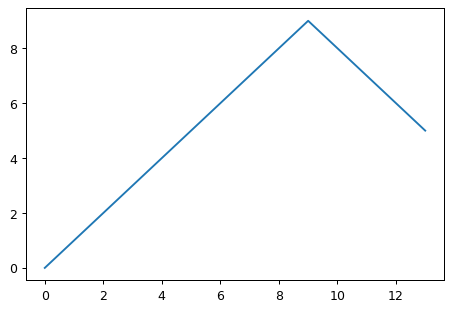

Also, we have no idea where down is, we only know the following:

* Down is in one direction
* The other direction goes up (except for the peak, but we'll ignore that for now)
* We are starting from X — in Python terms, we would know what index we are starting at

Consider array below:

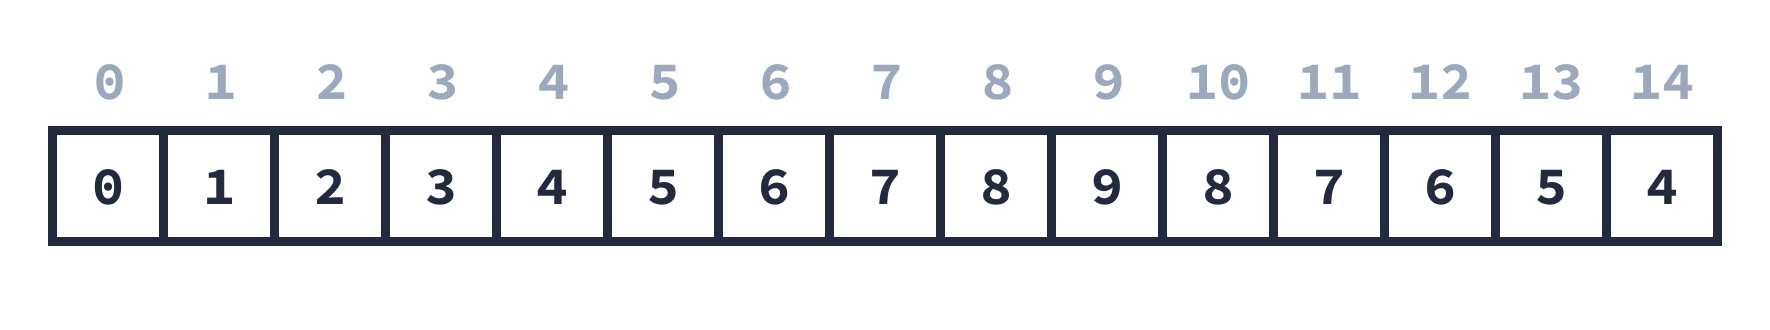

Let's imagine our starting spot, X, is at index 5, and we use a similar version of the previous function to find the minimum value. 

This function takes our starting value and starts moving toward the right to determine if it is going up or down; if the **next step is up**, it moves in the **opposite direction.**

* So, in this example, it would start at index 5, which has a value of `4`; it would check index 6 and find the value of 5 there, so it would move in the opposite direction all the way down to the left, ending at index 0 with a value of 0.

* If it were to start at index `10`, the value would go down to the right until it reached 4. Note that in this example, it wouldn't find the absolute minimum value.

In [5]:
def step_by_step_minimum(array):
    length = len(array)
    for index in range(length - 1):
        if array[index] < array[index+1]:
            return index, array[index]
    return length - 1, array[length - 1]


def step_by_step_random(array, index):
    
    #search for minimum value
    fetch_minimum = lambda x: step_by_step_minimum(x)[1]
    
    length = len(array)
    
    #starting from 0 point
    if index == 0: 
        return fetch_minimum(array)
    
    #If index is the last index (length - 1), return the minimum value of the reversed array.
    elif index == length - 1:
        return fetch_minimum(array[::-1]) #Reversed array
    
    #If the element before index is less than the element after index, return the minimum value of the subarray from the start to index (inclusive) reversed.
    elif array[index-1] < array[index+1]:
        return fetch_minimum(array[:index+1][::-1])
    
    return fetch_minimum(array[index:])

In [8]:
array = [5, 3, 8, 2, 9, 1]

# Find the first element that is smaller than the next element
index, value = step_by_step_minimum(array)
print(f"Index: {index}, Value: {value}")  # Output: Index: 1, Value: 3

# Find the minimum value based on a random starting point
random_index = 2
min_value = step_by_step_random(array, random_index)
print(f"Index: {random_index}, Value: {value}")  # Output: Index: 1, Value: 3

Index: 1, Value: 3
Index: 2, Value: 3


# Global vs Local Minima

This is the biggest problem for gradient descent — that we want to find the global minimum, but, since we have no idea what the slope looks like and have to take it one step at a time, we can very easily get stuck in a local minimum.

# Learning Rate

Based on the previous screen, the question we now face is How can we look for the lowest point of a slope, and not get stuck at a local minima, so we can find the global minima?

So far, our arrays have been finite, and we chose to look for the minimum of the array by looking at the previous and the next element in the array.

The ideal (but not universally attainable) goal of gradient descent is to find the global minimum of a **mathematical differentiable function.** In a differentiable function, we have infinite elements. **There's no such thing as the "next" or "previous" element.**

So how do we generalize what we saw so far to the infinite case? The answer is by introducing a hyperparameter that decides how much we should go forward or backward in search of the minimum. This hyperparameter is called the **learning rate.**

This is helpful in machine learning because we're frequently trying to minimize the loss function. This is what gradient descent helps us with!

## Learn

Given a differentiable real valued function 
 defined in an interval of R, the algorithm proceeds like this:

1 - Select the initial value, x0, in the domain of $f$ and a learning rate $\alpha$.

2 - Repeat the following step (which we index on n starting from 1) until a stopping condition is attained:
* Set $x_n = x_{n-1} - \alpha \cdot f'(x_{n-1})$, where $f'$ denotes the derivative of $f$
* $-f'(x_{n-1})$ points to the direction of minimum value (update function below)


In [ ]:
def derivative(x):
    return 2*(x - 1)

def update(x, alpha):
    return x - alpha*derivative(x)

def gradient_descent(x_0, alpha, iter_):
    values = [x_0]
    x = x_0
    for n in range(iter_):
        x = update(x, alpha)
        values.append(x)
    return values

lr = 2

## Stopping Criteria

There are two possible sets stopping conditions:

1. The user specifies a maximum number of iterations.

    *  The maximum number of iterations will protect us from running the algorithm forever.

1. The absolute difference between the values of the function at Xn and Xn-1  is smaller than a given number, called the tolerance or precision. There are other stopping criteria we can use in place of this one. A couple of examples include the following:

    * The absolute difference between Xn and Xn-1 is smaller than a given tolerance.

    * The value of the derivative at  is smaller than a given tolerance.

With this, we can now list three gradient descent hyperparamters that we've learned:

* Learning rate
* Stopping conditions
* Maximum number of iterations

In [ ]:
def f(x):
    return pow(x-1, 2) #function f(x)=(x-1)^2

def derivative(x):
    return 2*(x - 1)

def update(x, alpha):
    return x - alpha*derivative(x) #return current x

def gradient_descent(x_0, alpha, tolerance, max_iter):
    x = x_0
    
    for n in range(max_iter):
        previous_image = f(x)
        x = update(x, alpha)
        current_image = f(x)
        
        if abs(previous_image - current_image) < tolerance: #break at f(x-1) < tolerance < f(x) 
            break
    
    return x, f(x)